<a href="https://colab.research.google.com/github/sachanneeraj/Hotels-Data-Analysis-EDA/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Some Basic Steps Before Starting Our EDA

# First Step- Firstly we will import all the important libraries which helps us in our Analysis process

In [68]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



# Second Step - Now we will mount our google Drive and import the data into a variable form CSV File

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Now creating the Dataframe from the CSV file
Hotel_data = pd.read_csv('/content/drive/MyDrive/Hotel Booking - Neeraj Sachan/Hotel Bookings.csv')

# Third Step - Now we will check Whether our data is loaded successfull or not and then we will do some basic analysis of our data

In [4]:
#Lets check wheather DataFrame created successfully or not.
Hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
Hotel_data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
Hotel_data.shape

(119390, 32)

In [7]:
#Lets analyse the basic information of our DataFrame
Hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
#Now analyse some basic description of our DataFrame
Hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
Hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# Results:



*  From the above operations we can clearly sees that the our data contains 119390 rows ans 32 variables(columns) out of which maximum columns don't have null values in it.
*   Two columns(Company and Agent) contains large number of null values.



# Fourth Step - Cleaning the data and handling the null values.

* Let we check the which columns has the most number of null values.
 



In [10]:
null_values = Hotel_data.isna().sum().sort_values(ascending=False).head(8).reset_index().rename({0:"number of null values"},axis=1)
null_values

,index,number of null values
0,company,112593
1,agent,16340
2,country,488
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0
6,booking_changes,0
7,deposit_type,0




* As we can clearly see that only four columns(company,agent,country and children)contains the null vlues,But the "Company" and "agent" columns contains very large amount of null values i.e. 112593 and 16340 respectivily.So we can drop these columns 



In [11]:
Hotel_data.drop(['company','agent'],axis = 1,inplace = True)


In [12]:
Hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


*  We did not removed the country columns becouse it contain 488 null values out of 119390, which is negligible.So for dealing with these null values we will replace those null values with ABC


In [13]:
Hotel_data['country'] = Hotel_data['country'].fillna('ABC')

In [14]:
Hotel_data.shape

(119390, 30)

# Four children columns 4 rows have null values,which is very less.So we can replace these null values with 0.


In [15]:
Hotel_data['children'] = Hotel_data['children'].fillna(0)

In [16]:
Hotel_data['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])



* Changing this column data type into integer



In [17]:
Hotel_data['children'] = Hotel_data['children'].astype(int)

In [18]:
Hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

# Now our data is free from all the null values.

In [19]:
Hotel_data.isnull().sum().head(5)

hotel                 0
is_canceled           0
lead_time             0
arrival_date_year     0
arrival_date_month    0
dtype: int64

# Now we are removing those rows in which total number of guests is equal to 0 i.e. adult+children+babies ==0

In [20]:
Hotel_data[(Hotel_data.children+Hotel_data.adults+Hotel_data.babies)==0].shape

(180, 30)



* 180 rows have total number of guests == 0



# Droping those 180 rows

In [21]:
Hotel_data = Hotel_data.drop(Hotel_data[(Hotel_data.children+Hotel_data.adults+Hotel_data.babies)==0].index)

# For reducing number of columns we can drop the columns namely adults children,babies and create a single columns in place of those namely Total number of guest.

In [22]:
Hotel_data['Total_number_of_guest'] = Hotel_data['adults']+Hotel_data['children']+Hotel_data['babies']
Hotel_data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_number_of_guest
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1


In [23]:
Hotel_data.drop(['adults','children','babies'], axis = 1, inplace = True)

# Now our data is cleaned.Now we will do the EDA on in.

In [24]:
Hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   meal                            119210 non-null  object 
 10  country                         119210 non-null  object 
 11  market_segment                  119210 non-null  object 
 12  distribution_cha

# Q1. **Which type of customers do more booking ?**

In [25]:
#lets copy our cleaned data into our new variable data
data = Hotel_data.copy()

In [26]:
non_canceled = data[data['is_canceled']==0]
non_canceled.shape

(75011, 28)

In [27]:
non_canceled["customer_type"].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [28]:
customer_type = non_canceled['customer_type'].value_counts()
customer_type

Transient          52982
Transient-Party    18703
Contract            2810
Group                516
Name: customer_type, dtype: int64

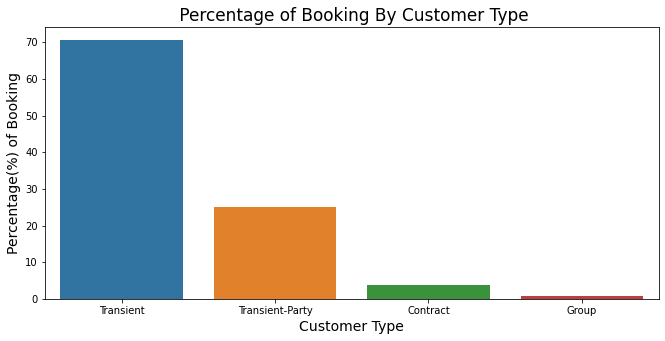

In [29]:
plt.figure(figsize=(11,5))
sns.barplot(x=customer_type.index,y =(customer_type.values*100)/non_canceled['customer_type'].count())
plt.xlabel("Customer Type", fontsize = 14)
plt.ylabel("Percentage(%) of Booking", fontsize = 14)
plt.title(" Percentage of Booking By Customer Type", fontsize = 17)
plt.show()





# What do we see here ?
 

*  Booking by Transient Customer is more than other type of Customers(approx. 70% of total bookings).



#  Q2. **Let's have an overview which type of hotel generally people prefer to book ?**

In [30]:
hotel_type = data["hotel"].value_counts().reset_index().rename(columns={"index":"Hotel Type", 'hotel': "Number of bookings"})
hotel_type

,Hotel Type,Number of bookings
0,City Hotel,79163
1,Resort Hotel,40047


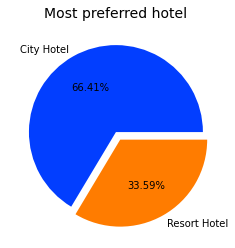

In [31]:
palette_color = sns.color_palette('bright')
plt.pie(x=hotel_type['Number of bookings'], labels=hotel_type['Hotel Type'], colors=palette_color, explode=[0,.1],autopct='%1.2f%%')
plt.title('Most preferred hotel', fontsize=14)
plt.show()

# What do we see here ?



* It seems that a huge proportion of hotel was city hotel. Resort hotel tend to be on the expensive side and most people will just stick with city hotels.

* Also , resort hotels tend to be appropriate for larger group of people.













# Q3. **Let's have an overview which type of deposit is more preferred by customers ?**

In [32]:
deposit_type=data['deposit_type'].value_counts()
deposit_type

No Deposit    104461
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

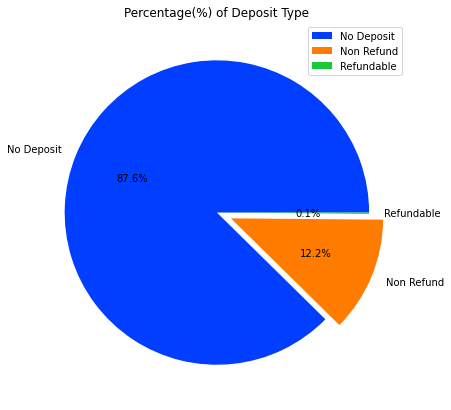

In [33]:
plt.figure(figsize=(14,7))
plt.pie(x=deposit_type.values, labels=deposit_type.index,colors=palette_color,  explode=[0,0.1,0], autopct='%1.1f%%')
plt.legend( labels=deposit_type.index, loc='best')
plt.title('Percentage(%) of Deposit Type')
plt.show()

# What do we see here ?
* 87.6% of guests prefer "No deposit" type of deposit.

# Q4.**What kind of food is mostly preferred by the guest ?**

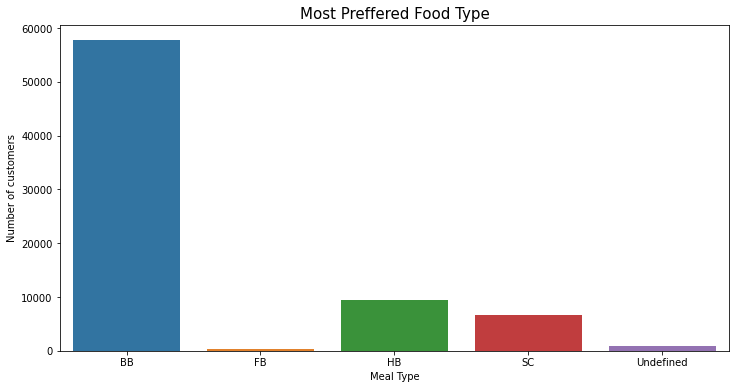

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(x=non_canceled['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Number of customers')
plt.title('Most Preffered Food Type', fontsize=15)
plt.show()

# What do we see here ?


*   So the most prefered food by the customers is BB(BED and BREAKFAST).
*   HB(HALF BOARD) and SC(SELF CATERING) are approx.equally prefered.


# Q5. **Let's have an overview how much guests pay for a room per night ?**





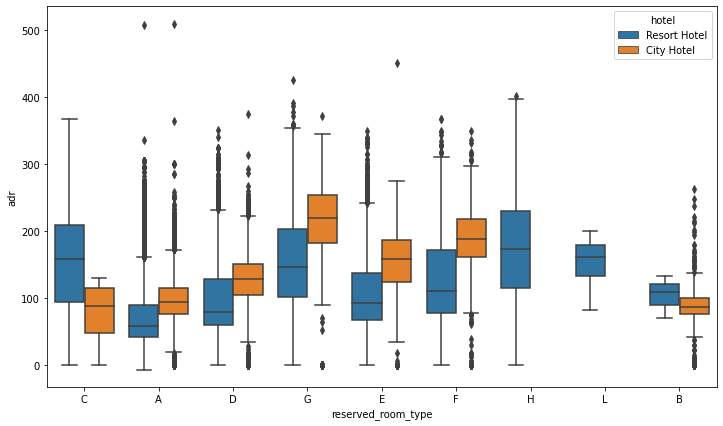

In [35]:
plt.figure(figsize=(12,7))
sns.boxplot(x='reserved_room_type', y='adr', data=non_canceled, hue ='hotel')
plt.show()

# Observations


*   The figure shows that the average price per room depends on its type.

*   For Resorts G,H and C type of rooms are most costly.

*   For city hotels ,G type rooms are most costly.They are more expensive then the resort hotels.



# Q6.**What is the most preferred room type ?**


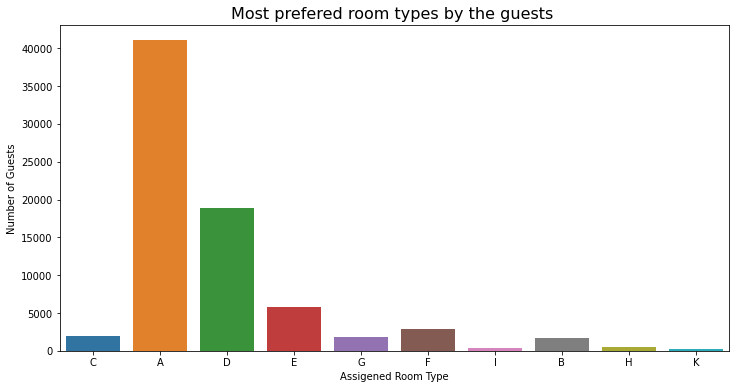

In [36]:
plt.figure(figsize = (12,6))
sns.countplot(x=non_canceled['assigned_room_type'])
plt.xlabel('Assigened Room Type')
plt.ylabel('Number of Guests')
plt.title('Most prefered room types by the guests ' , fontsize =16)
plt.show()

# What do we see here ?


*  THe most prefered room is A (Room Type)



#Q7.**Looking into which countries mostly visitors are coming from ?**

In [37]:
guest_country =non_canceled['country'].value_counts().reset_index().rename(columns={'index':'Country', 'country':'Number of guests'})
guest_country

,Country,Number of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


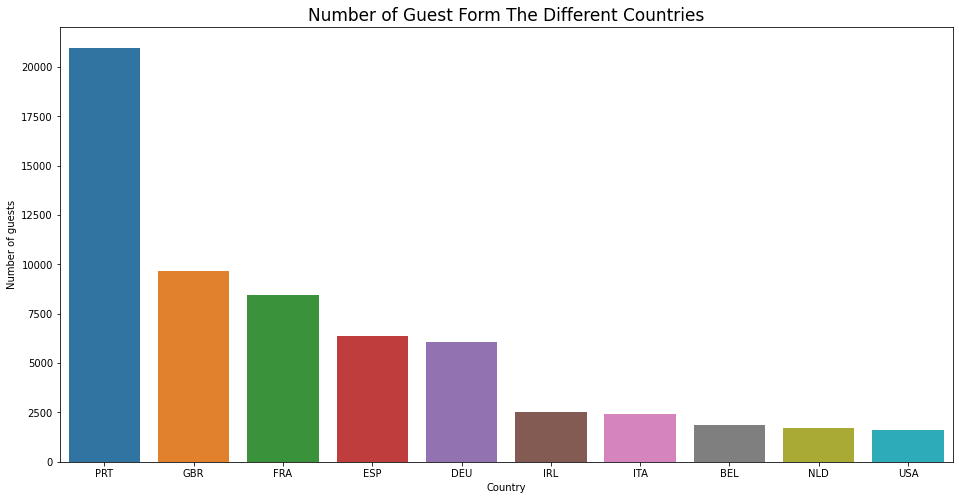

In [69]:
#plotting bar graph for the top 15 countries
plt.figure(figsize=(16,8))
sns.barplot(x=guest_country['Country'].head(10), y=guest_country['Number of guests'].head(10))
plt.title("Number of Guest Form The Different Countries",fontsize = 17)
plt.show()

# What do we see here ?
 * Most of the guests are coming from portugal. More than 25000 guests are from portugal.

# Q8. **What is the percentage of repeated guest ?**




In [39]:
repeated_guest = non_canceled['is_repeated_guest'].value_counts()
repeated_guest

0    71806
1     3205
Name: is_repeated_guest, dtype: int64

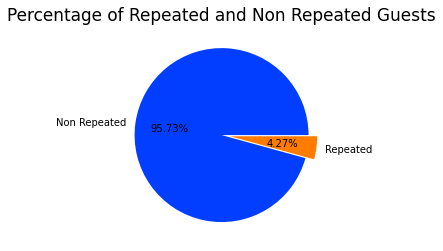

In [40]:
plt.pie(repeated_guest, labels=['Non Repeated','Repeated'], explode = [0,0.1],colors= palette_color, autopct = "%1.2f%%")
plt.title("Percentage of Repeated and Non Repeated Guests", fontsize =17)
plt.show()

# What do  we see here ?

*   Repeated guest are very few which only 4.27%.

*   In order to retained the guests management shoud take feedbacks from guests and try to improve the services.



# Q9.**Which hotel has high chance that its customer will return for another stay?**

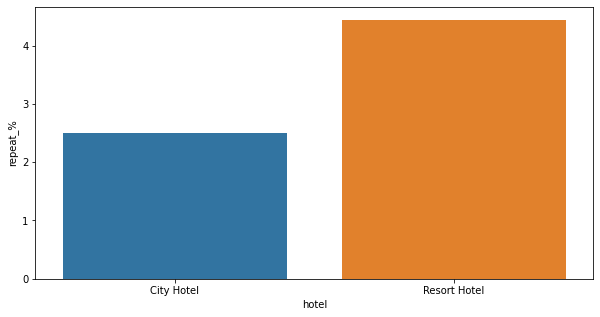

In [41]:
# Selecting and counting repeated customers bookings
repeated_data = Hotel_data[Hotel_data['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})
#Counting total bookings
total_booking = Hotel_data.groupby('hotel').size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)
#Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'])
plt.show()

# What do we see here ?
* Both hotels have very small percentage that customer will repeat, but Resort hotel has slightly higher repeat % than City Hotel.



# Q10. **Which hotels generating more ADR ?**

In [42]:
adr = non_canceled.groupby('hotel')["adr"].mean().reset_index()
adr

,hotel,adr
0,City Hotel,106.036141
1,Resort Hotel,90.822527


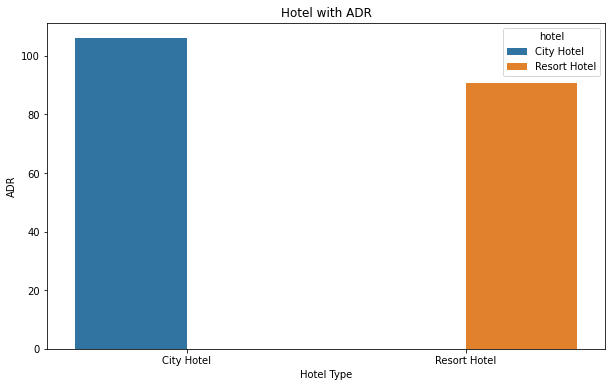

In [43]:
plt.figure(figsize =(10,6))
sns.barplot(x=adr['hotel'],y=adr['adr'], hue=adr['hotel'])
plt.title("Hotel with ADR")
plt.xlabel("Hotel Type")
plt.ylabel("ADR")
plt.show()

# What do we see here ?

*  Resort Hotel has the lowest ADR . That means Resort hotels are generating less revenues than the city hotels.
* More the ADR more  is the  revenue.



# Q11.**What is the relationship between total number of Guests and ADR ?**

In [44]:
guest_vs_adr = non_canceled.groupby("Total_number_of_guest")['adr'].mean().head()
guest_vs_adr

Total_number_of_guest
1     76.528818
2     97.952208
3    140.476984
4    183.148029
5    218.864660
Name: adr, dtype: float64

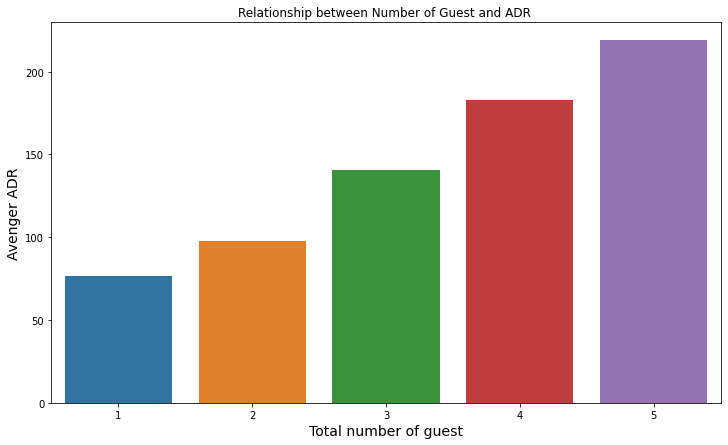

In [45]:
plt.figure(figsize=(12,7))
sns.barplot(x=guest_vs_adr.index, y=guest_vs_adr.values)
plt.title("Relationship between Number of Guest and ADR ")
plt.xlabel("Total number of guest", fontsize = 14)
plt.ylabel("Avenger ADR", fontsize =14)
plt.show()

# What do we see here ?


*  As the total number of people increses .Thus adr and Total people are directly proportional to each other.



# Q12 . **What is the relationship between total stay and ADR ?**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


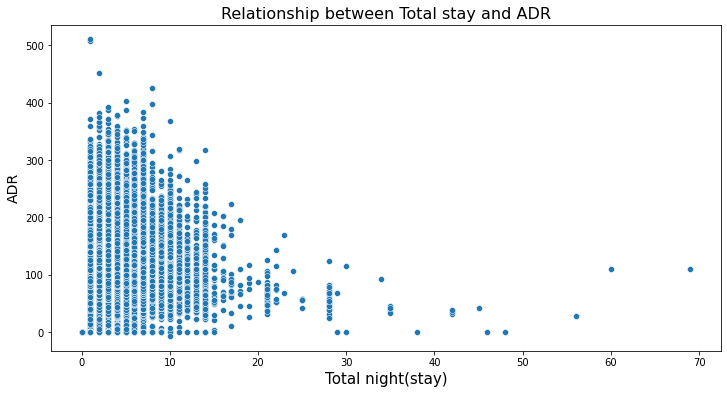

In [46]:
non_canceled['total_nights']=non_canceled['stays_in_week_nights']+non_canceled['stays_in_weekend_nights']

plt.figure(figsize=(12,6))
sns.scatterplot(x=non_canceled['total_nights'], y = non_canceled['adr'])
plt.title('Relationship between Total stay and ADR', fontsize =16)
plt.xlabel('Total night(stay)', fontsize = 15)
plt.ylabel("ADR",fontsize =14)
plt.show()

# What we see here ?

*  As  the total stay increses adr is descresing. Thus , for longer stays customer can get good adr (price).







# Q13. **Which year had the highest Booking ?**

Text(0.5, 1.0, 'Year Wise Bookings')

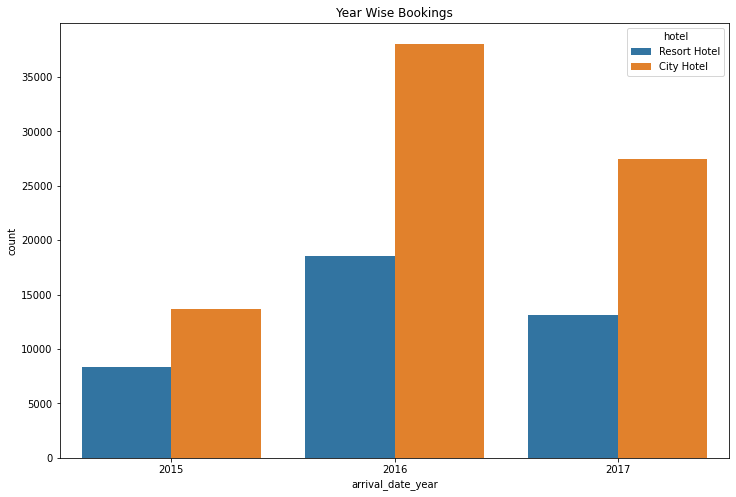

In [47]:
# Set plot size
plt.figure(figsize=(12,8))

# plot with countplot
sns.countplot(x=Hotel_data['arrival_date_year'],hue=Hotel_data['hotel'])
plt.title('Year Wise Bookings')


# What do we see here ?


*   2016 had the highest bookings.

*   2015 had less  Bookings.

*   Overall City hotels had the most of the Bookings.




# Q14. **In which month most of the bookings happened?**

In [48]:
monthly_bookings = non_canceled.groupby('arrival_date_month')['hotel'].value_counts().unstack().reset_index()
monthly_bookings

hotel,arrival_date_month,City Hotel,Resort Hotel
0,April,4010,2550
1,August,5367,3257
2,December,2377,2014
3,February,3051,2308
4,January,2249,1866
5,July,4770,3137
6,June,4358,2037
7,March,4049,2571
8,May,4568,2535
9,November,2676,1975


In [49]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays
import sort_dataframeby_monthorweek as sd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3441 sha256=c1c2d8bf06bbe6760d60c3db34aa8c16987c6b3a685d23d4ea706e484a48ab6d
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3246 sha256=9e3f111e835e9e6c99116cbe24ad75c8556435374ea52374200e91af0a6f653b
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [50]:
monthly_bookings=sd.Sort_Dataframeby_Month(monthly_bookings,'arrival_date_month')
monthly_bookings

,arrival_date_month,City Hotel,Resort Hotel
0,January,2249,1866
1,February,3051,2308
2,March,4049,2571
3,April,4010,2550
4,May,4568,2535
5,June,4358,2037
6,July,4770,3137
7,August,5367,3257
8,September,4283,2102
9,October,4326,2575


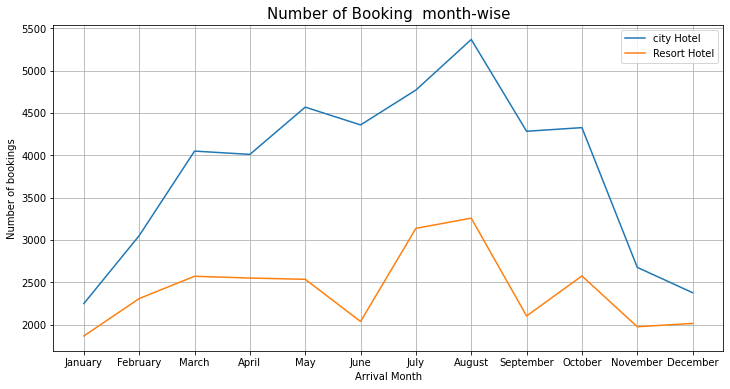

In [51]:
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_bookings['arrival_date_month'], y=monthly_bookings['City Hotel'])
sns.lineplot(x=monthly_bookings['arrival_date_month'], y=monthly_bookings['Resort Hotel'])
plt.xlabel('Arrival Month')
plt.ylabel('Number of bookings')
plt.title("Number of Booking  month-wise",fontsize=15)
plt.grid()
plt.legend(labels=['city Hotel','Resort Hotel'])
plt.show()

# What do we see here ?





*  July and August monthly had the most Bookings.Summer vacation can be the resons for bookings


# Q15. **How does the price vary over the year ?**


In [52]:
mean_price = non_canceled.groupby(['arrival_date_month','hotel'])['adr'].mean().unstack().reset_index()
mean_price

hotel,arrival_date_month,City Hotel,Resort Hotel
0,April,111.962267,75.867816
1,August,118.674598,181.205892
2,December,88.401855,68.410104
3,February,86.520062,54.147478
4,January,82.330983,48.761125
5,July,115.818019,150.122528
6,June,117.874360,107.974850
7,March,90.658533,57.056838
8,May,120.669827,76.657558
9,November,86.946592,48.706289


Now we see that month column is not in order, and if we visualize we will get improper conclusions .So we set them in proper order first.

In [53]:
import sort_dataframeby_monthorweek as sd
mean_price=sd.Sort_Dataframeby_Month(mean_price,'arrival_date_month')
mean_price

,arrival_date_month,City Hotel,Resort Hotel
0,January,82.330983,48.761125
1,February,86.520062,54.147478
2,March,90.658533,57.056838
3,April,111.962267,75.867816
4,May,120.669827,76.657558
5,June,117.874360,107.974850
6,July,115.818019,150.122528
7,August,118.674598,181.205892
8,September,112.776582,96.416860
9,October,102.004672,61.775449


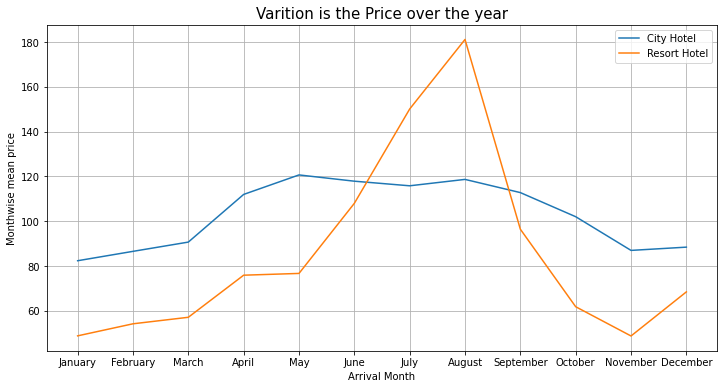

In [54]:
plt.figure(figsize=(12,6))
sns.lineplot(x=mean_price['arrival_date_month'],y=mean_price['City Hotel'])
sns.lineplot(x=mean_price['arrival_date_month'], y=mean_price['Resort Hotel'])
plt.xlabel("Arrival Month")
plt.ylabel("Monthwise mean price")
plt.grid()
plt.legend(labels=["City Hotel", "Resort Hotel"])
plt.title("Varition is the Price over the year" , fontsize = 15)
plt.show()

# What do we see here ?




* For Resort hotel adr is high in the month June,July,August as compared to City Hotels. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.

* From 9 observation, it is cleared that the, both type of hotels have the fewest guests during the winter. Therefore, the best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December as the average daily rate in this month is very low.

# Q16. **What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?**




In [55]:
special_req = data.groupby('hotel')['total_of_special_requests'].value_counts().unstack().T
special_req

hotel,City Hotel,Resort Hotel
total_of_special_requests,,
0,47853,22348
1,21377,11806
2,8125,4827
3,1584,910
4,198,142
5,26,14


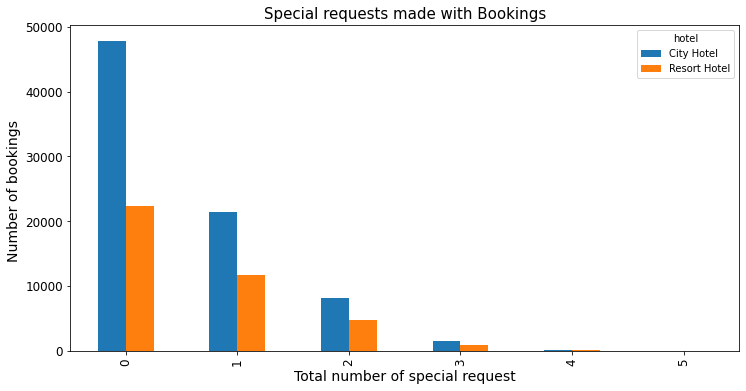

In [56]:
special_req.plot.bar(figsize=(12,6), fontsize=12)
plt.xlabel("Total number of special request" , fontsize = 14)
plt.ylabel("Number of bookings " , fontsize = 14)
plt.title('Special requests made with Bookings' , fontsize =15)
plt.show()


# What do  we see here ?


* Maximum customer do not made any special requests alongwith their bookings.
*    Number of special request is higher in case of city hotel, because the number of bookings is also higher.
* In the end, we can say that, very few customers made more than 2 special requests. 



# **Correlation of the Columns** 

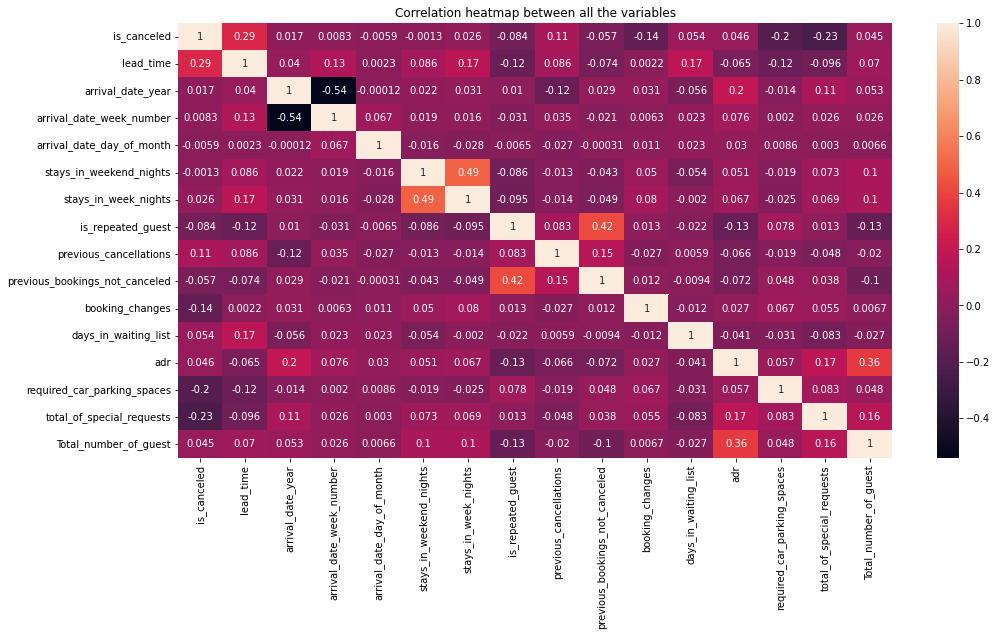

In [57]:
plt.figure(figsize=(16,8))
plt.title("Correlation heatmap between all the variables")
sns.heatmap(data.corr(), annot=True)
plt.show()

# What do  we see here ?
* is_canceled and same_room_alloted_or_not are posittively corelated. That means customer is sometimes cancel his bookings if he don't get the same room as per reserved room.
* lead_time and total_stay is positively corelated.That means more is the stay of cutsomer more will be the lead time.
* total number of guest is positevely corelated to each other. That means more the people more will be adr.
* is_repeated guest and previous bookings not canceled has strong corelation. May be repeated guests are not more likely to cancel their bookings.


# Q17. **How long people stays in hotel ?**

In [58]:
non_canceled.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'Total_number_of_guest', 'total_nights'],
      dtype='object')

In [59]:
data["Total night"]=data['stays_in_weekend_nights']+data['stays_in_week_nights']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_number_of_guest,Total night
0,Resort Hotel,0,342,2015,July,27,1,0,0,BB,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,BB,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,BB,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,BB,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


In [60]:
total_nights=data["Total night"].value_counts().sort_index()
total_nights.head()

0      645
1    21005
2    27632
3    27064
4    17373
Name: Total night, dtype: int64

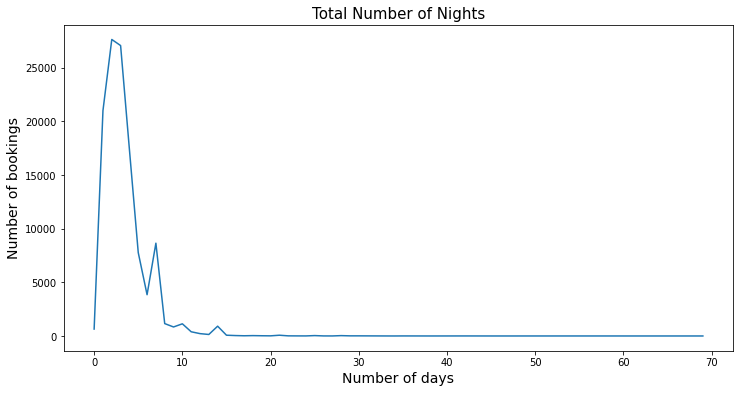

In [61]:
plt.figure(figsize=(12,6))
plt.plot(total_nights)
plt.xlabel('Number of days' ,fontsize = 14)
plt.ylabel('Number of bookings', fontsize = 14)
plt.title('Total Number of Nights', fontsize =15)
plt.show()

# What do we see here ?
* Guestes booked hotels mostly for 0 to 3 nights. 
* Very few guests booked hotels for more than 8 days

# Q18. **Is customer canceled their bookings if they are not allotted with the same room type which was reserved by them ?**

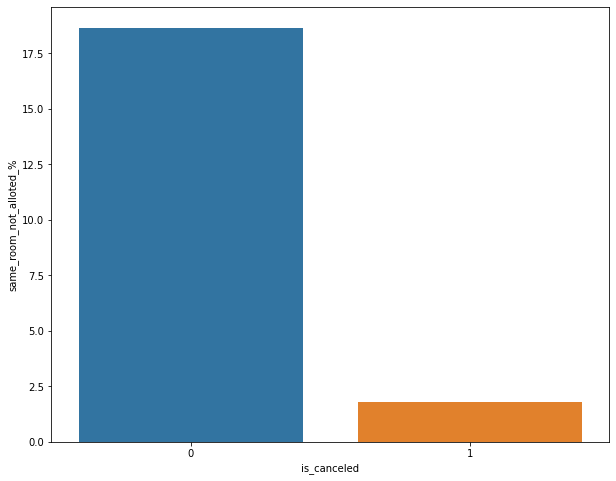

In [62]:
def check_room_allot(x):
  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0
Hotel_data['same_room_not_alloted'] = Hotel_data.apply(lambda x : check_room_allot(x), axis = 1)
grp_by_canc = Hotel_data.groupby('is_canceled')
D3 = pd.DataFrame((grp_by_canc['same_room_not_alloted'].sum()/grp_by_canc.size())*100).rename(columns = {0:'same_room_not_alloted_%'})
plt.figure(figsize = (10,8))
sns.barplot(x = D3.index, y = D3 ['same_room_not_alloted_%'])
plt.show()

# What do we see here ?

*  We see that not getting same room as demanded is not the case of cancellation of rooms. A significant percentage of bookings are not cancelled even after getting different room as demanded.



#  Q19. **Which distribution channel contributed  more to generate high ADR ?**

In [63]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'Total_number_of_guest', 'Total night'],
      dtype='object')

In [64]:
adr_by_channel = non_canceled.groupby(['hotel','distribution_channel'])['adr'].mean().reset_index()
adr_by_channel

,hotel,distribution_channel,adr
0,City Hotel,Corporate,83.246747
1,City Hotel,Direct,110.918855
2,City Hotel,GDS,119.933462
3,City Hotel,TA/TO,106.837587
4,Resort Hotel,Corporate,51.556065
5,Resort Hotel,Direct,102.378177
6,Resort Hotel,TA/TO,92.116112
7,Resort Hotel,Undefined,112.700000


* Corporate- These are corporate hotel booing companies which makes bookings possible.
* GDS-A GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.
* Direct- means that bookings are directly made with the respective hotels
* TA/TO- means that booings are made through travel agents or travel operators.
* Undefined- Bookings are undefined. May be customers made their bookings on arrival.

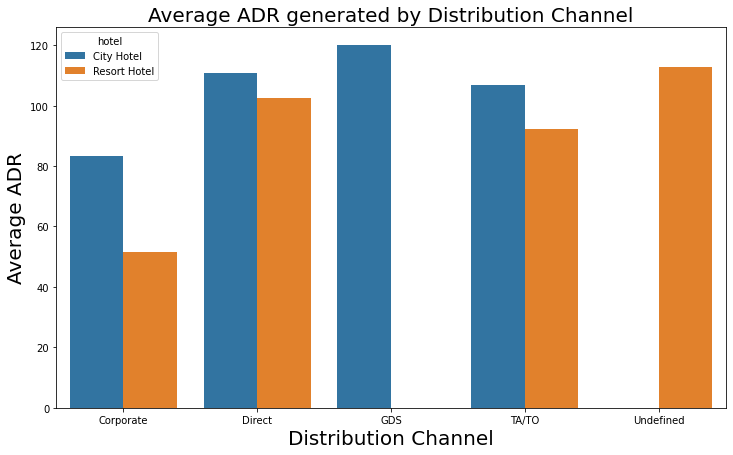

In [65]:
plt.figure(figsize=(12,7))
sns.barplot(x='distribution_channel', y="adr",data = adr_by_channel , hue = 'hotel')
plt.title("Average ADR generated by Distribution Channel", fontsize = 20)
plt.xlabel("Distribution Channel" , fontsize = 20)
plt.ylabel("Average ADR", fontsize = 20)
plt.show()

# What do we see here ?
* 'Direct' and 'TA/TO' has almost equally contributed in ADR in both types of hotels.
* GDS has highly contributed in adr in 'City Hotel' type.
* GDS need to increase Resort Hotel Bookings, for increasing its ADR.
* Resorts made high ADR by Undefined mode of booking also.

#Q20. **Which distribution channel has the highest Cancellation rate ?**

In [66]:
canceled_df = Hotel_data[Hotel_data['is_canceled']==1]

#group by  distribution channel.
canceled_df = canceled_df.groupby(['distribution_channel','hotel']).size().reset_index().rename(columns={0:'Counts'})
canceled_df 

,distribution_channel,hotel,Counts
0,Corporate,City Hotel,779
1,Corporate,Resort Hotel,688
2,Direct,City Hotel,1230
3,Direct,Resort Hotel,1325
4,GDS,City Hotel,37
5,TA/TO,City Hotel,31029
6,TA/TO,Resort Hotel,9107
7,Undefined,City Hotel,4


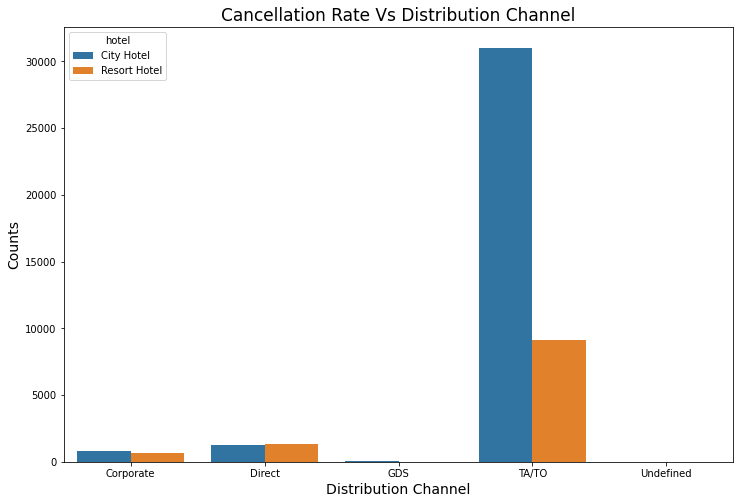

In [67]:
plt.figure(figsize = (12,8))
sns.barplot(x = "distribution_channel", y ='Counts',hue = 'hotel',data = canceled_df)
plt.xlabel("Distribution Channel" ,fontsize = 14 )
plt.ylabel("Counts" , fontsize = 14)
plt.title("Cancellation Rate Vs Distribution Channel",fontsize = 17)
plt.show()

# What do we see here ?
* In "TA/TO", City hotels has the high cancellation rate compared to resort
hotels.

* In "direct" both the hotels has almost same cancellation rate.